Univariate Analysis - Price and Room Type

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import pandas as pd
from mongo_client import fetch_listings 
# Loa# Load the data into df
df = fetch_listings(limit=6000)
print("Loaded:", df.shape)

Loaded: (5555, 42)


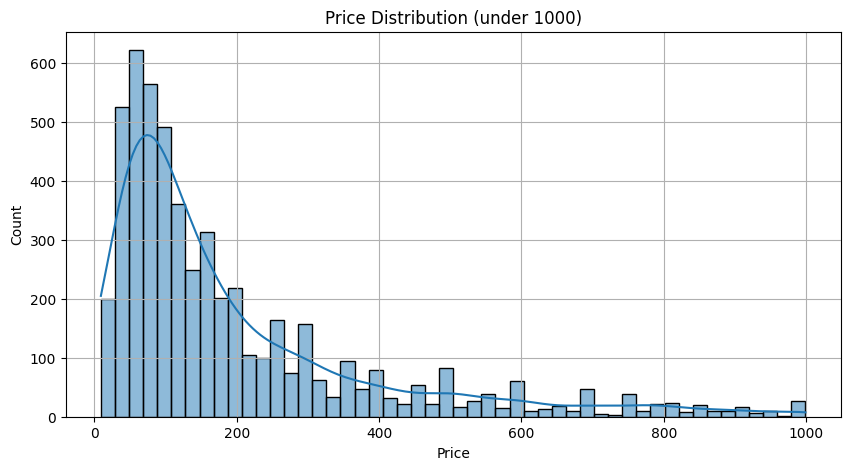

In [14]:
# Plot distribution of price with outlier control
plt.figure(figsize=(10, 5))
sns.histplot(df[df['price'] < 1000]['price'], bins=50, kde=True)
plt.title('Price Distribution (under 1000)')
plt.xlabel('Price')
plt.ylabel('Count')
plt.grid(True)
plt.show()

C:\Users\prasa\AppData\Local\Temp\ipykernel_13100\3429269436.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='room_type', order=df['room_type'].value_counts().index, palette='viridis')


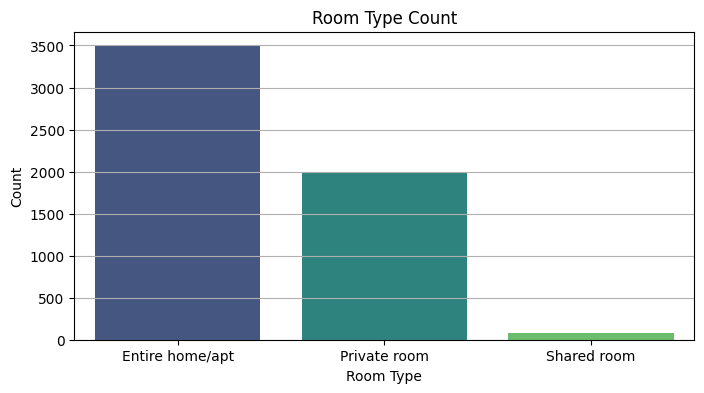

In [15]:
# Count of listings by room type
plt.figure(figsize=(8, 4))
sns.countplot(data=df, x='room_type', order=df['room_type'].value_counts().index, palette='viridis')
plt.title('Room Type Count')
plt.xlabel('Room Type')
plt.ylabel('Count')
plt.grid(axis='y')
plt.show()


C:\Users\prasa\AppData\Local\Temp\ipykernel_13100\2846558710.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='room_type', y='price', palette='pastel')


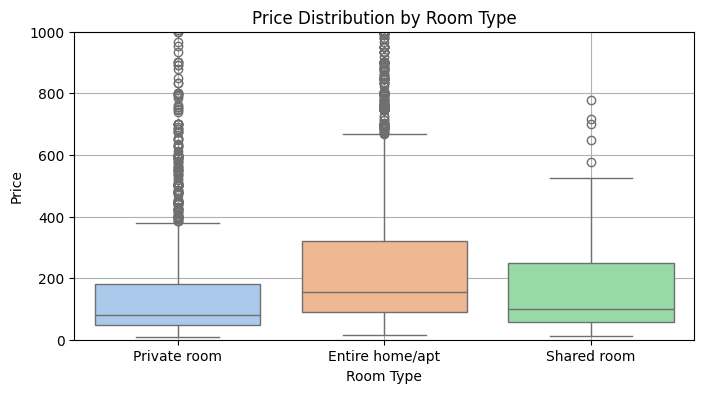

In [16]:
# Average price by room type
plt.figure(figsize=(8, 4))
sns.boxplot(data=df, x='room_type', y='price', palette='pastel')
plt.title('Price Distribution by Room Type')
plt.xlabel('Room Type')
plt.ylabel('Price')
plt.ylim(0, 1000)  # Optional: limit to show clearer comparison
plt.grid(True)
plt.show()


Multivariate Analysis 

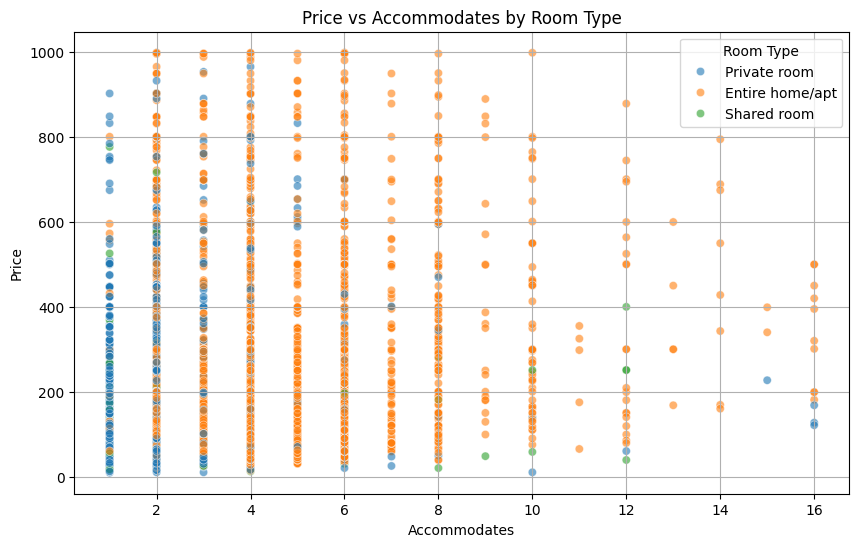

In [17]:
#Price vs. Accommodates by Room Type
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df[df['price'] < 1000], x='accommodates', y='price', hue='room_type', alpha=0.6)
plt.title('Price vs Accommodates by Room Type')
plt.xlabel('Accommodates')
plt.ylabel('Price')
plt.grid(True)
plt.legend(title='Room Type')
plt.show()

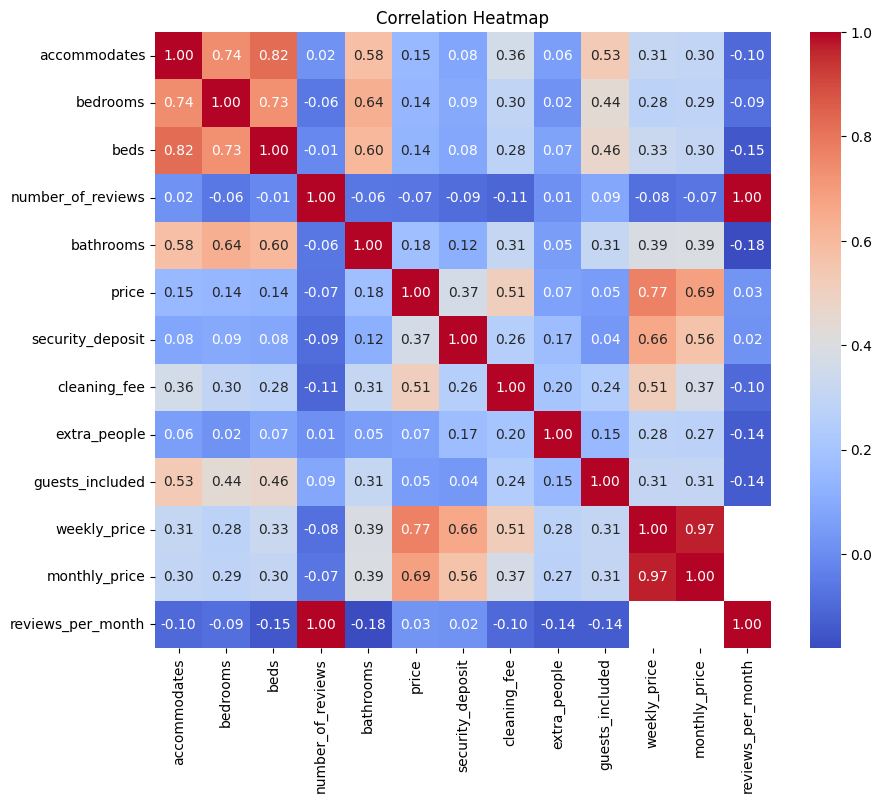

In [18]:
# Correlation heatmap for numeric fields
plt.figure(figsize=(10, 8))
numeric_cols = df.select_dtypes(include=['int64', 'float64']).corr()
sns.heatmap(numeric_cols, annot=True, cmap='coolwarm', fmt='.2f', square=True)
plt.title('Correlation Heatmap')
plt.show()

Location-based Analysis

In [5]:
print('address' in df.columns)


True


In [6]:
# Extract city and country from the nested 'address' column
df['city'] = df['address'].apply(
    lambda x: x.get('market') if isinstance(x, dict) and 'market' in x 
    else x.get('city', None) if isinstance(x, dict) 
    else None
)

df['country'] = df['address'].apply(
    lambda x: x.get('country', None) if isinstance(x, dict) 
    else None
)


In [7]:
print(df.columns.tolist())


['_id', 'listing_url', 'name', 'summary', 'space', 'description', 'neighborhood_overview', 'notes', 'transit', 'access', 'interaction', 'house_rules', 'property_type', 'room_type', 'bed_type', 'minimum_nights', 'maximum_nights', 'cancellation_policy', 'last_scraped', 'calendar_last_scraped', 'first_review', 'last_review', 'accommodates', 'bedrooms', 'beds', 'number_of_reviews', 'bathrooms', 'amenities', 'price', 'security_deposit', 'cleaning_fee', 'extra_people', 'guests_included', 'images', 'host', 'address', 'availability', 'review_scores', 'reviews', 'weekly_price', 'monthly_price', 'reviews_per_month', 'city', 'country']


C:\Users\prasa\AppData\Local\Temp\ipykernel_10900\418355110.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_cities.values, y=top_cities.index, palette='magma')


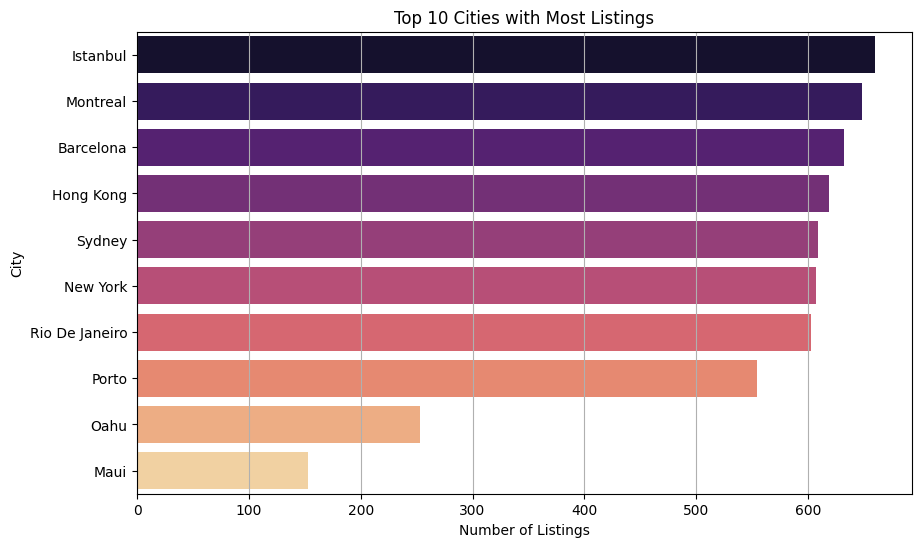

In [ ]:
# Count listings by city
plt.figure(figsize=(10, 6))
sns.barplot(x=top_cities.values, y=top_cities.index, palette='magma')
plt.title('Top 10 Cities with Most Listings')
plt.xlabel('Number of Listings')
plt.ylabel('City')
plt.grid(True, axis='x')
plt.show()


C:\Users\prasa\AppData\Local\Temp\ipykernel_10900\2582660837.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_cities.values, y=top_cities.index, palette='magma')


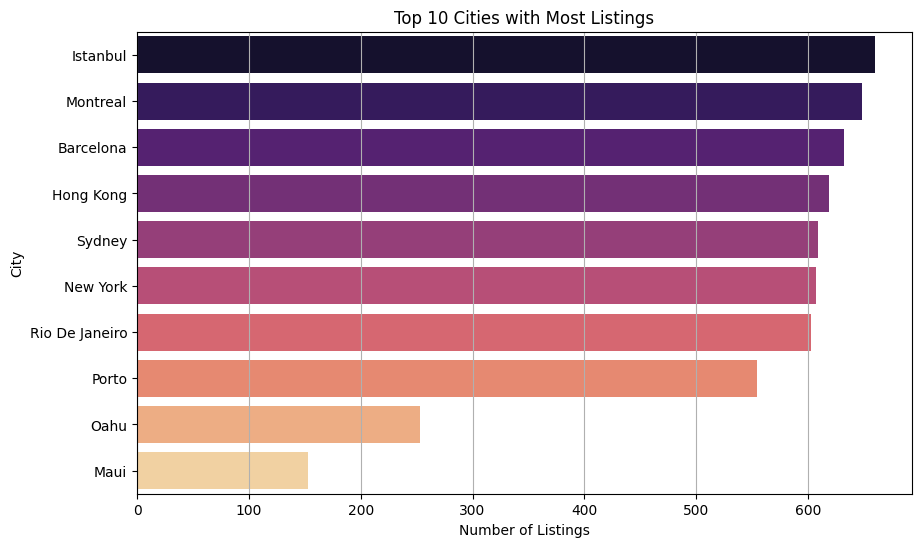

In [9]:
#Listings by City
plt.figure(figsize=(10, 6))
top_cities = df['city'].value_counts().nlargest(10)
sns.barplot(x=top_cities.values, y=top_cities.index, palette='magma')
plt.title('Top 10 Cities with Most Listings')
plt.xlabel('Number of Listings')
plt.ylabel('City')
plt.grid(True, axis='x')
plt.show()

C:\Users\prasa\AppData\Local\Temp\ipykernel_10900\2164343307.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_city_avg_price.values, y=top_city_avg_price.index, palette='coolwarm')


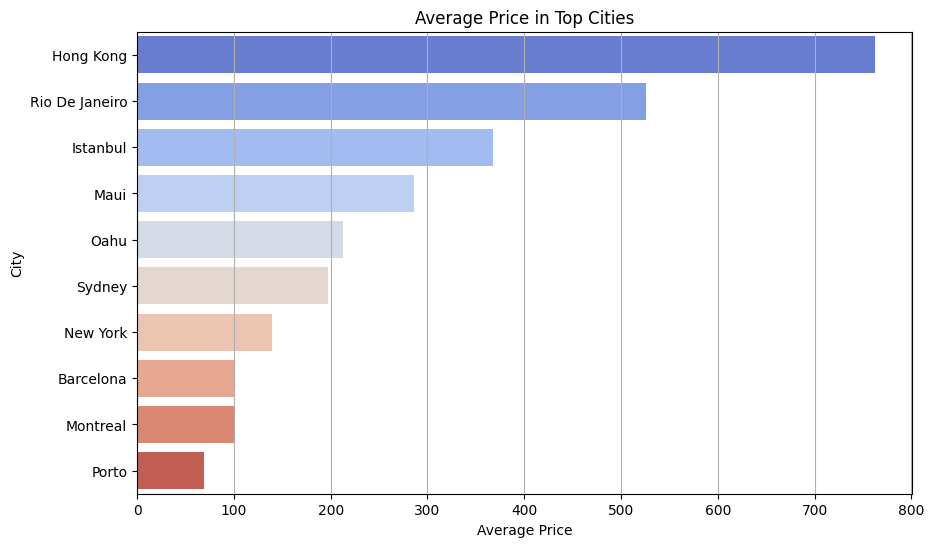

In [14]:
# Average price by top cities
plt.figure(figsize=(10, 6))
top_city_avg_price = df[df['city'].isin(top_cities.index)].groupby('city')['price'].mean().sort_values(ascending=False)
sns.barplot(x=top_city_avg_price.values, y=top_city_avg_price.index, palette='coolwarm')
plt.title('Average Price in Top Cities')
plt.xlabel('Average Price')
plt.ylabel('City')
plt.grid(True, axis='x')
plt.show()

Availability Analysis by Season

In [19]:
print(df.dtypes)

_id                              object
listing_url                      object
name                             object
summary                          object
space                            object
description                      object
neighborhood_overview            object
notes                            object
transit                          object
access                           object
interaction                      object
house_rules                      object
property_type                    object
room_type                        object
bed_type                         object
minimum_nights                   object
maximum_nights                   object
cancellation_policy              object
last_scraped                     object
calendar_last_scraped            object
first_review             datetime64[ns]
last_review              datetime64[ns]
accommodates                      int64
bedrooms                        float64
beds                            float64


In [16]:
# Ensure date columns are datetime type
df['first_review'] = pd.to_datetime(df['first_review'], errors='coerce')
df['last_review'] = pd.to_datetime(df['last_review'], errors='coerce')

In [18]:
# Extract month from last review to analyze seasonal trends
df['review_month'] = df['last_review'].dt.month

In [20]:
# Average price by month
monthly_price = df[df['review_month'].notnull()].groupby('review_month')['price'].mean()

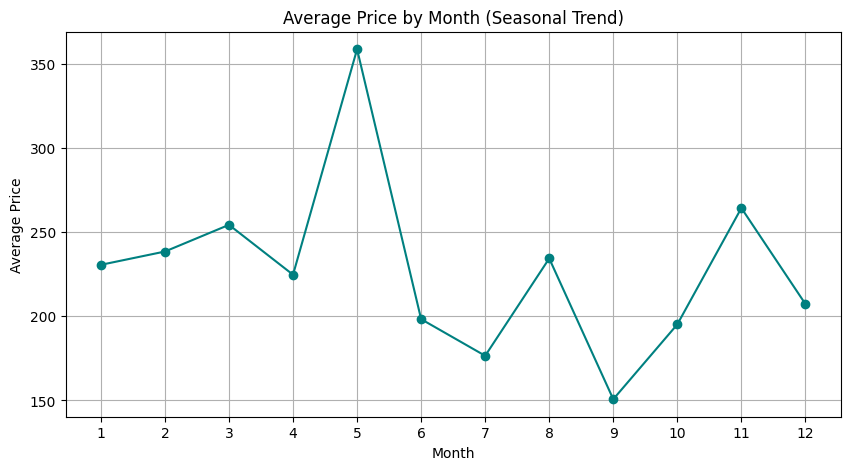

In [21]:
# Plot average price trend by month
plt.figure(figsize=(10, 5))
monthly_price.plot(marker='o', color='teal')
plt.title('Average Price by Month (Seasonal Trend)')
plt.xlabel('Month')
plt.ylabel('Average Price')
plt.xticks(ticks=range(1, 13))
plt.grid(True)
plt.show()

C:\Users\prasa\AppData\Local\Temp\ipykernel_10900\1261056273.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=monthly_reviews.index, y=monthly_reviews.values, palette='crest')


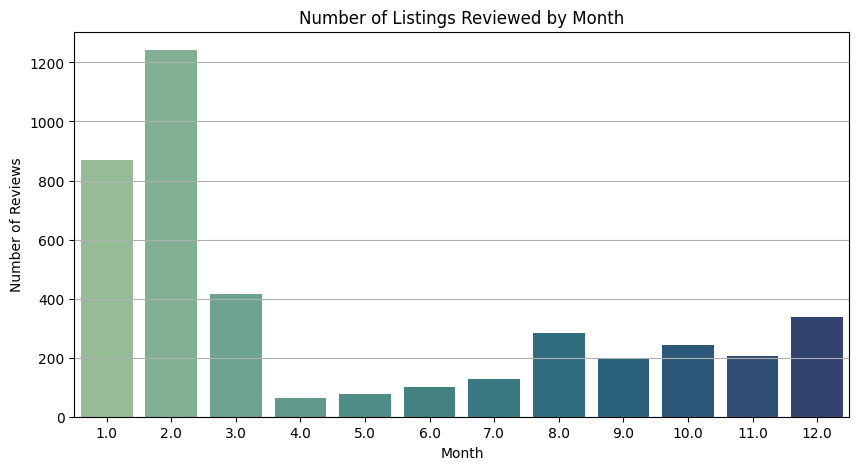

In [22]:
# Review volume per month (as proxy for availability/demand)
monthly_reviews = df['review_month'].value_counts().sort_index()

plt.figure(figsize=(10, 5))
sns.barplot(x=monthly_reviews.index, y=monthly_reviews.values, palette='crest')
plt.title('Number of Listings Reviewed by Month')
plt.xlabel('Month')
plt.ylabel('Number of Reviews')
plt.grid(axis='y')
plt.show()


Location-Based Insights

In [35]:
print(df[['longitude', 'latitude']].head())
print(df[['longitude', 'latitude']].isnull().sum())


   longitude  latitude
0  -73.96523  40.79962
1   28.98009  41.00620
2  114.15027  22.28158
3  114.16690  22.33140
4  151.21554 -33.88029
longitude    0
latitude     0
dtype: int64


In [25]:
df['longitude'] = df['address'].apply(lambda x: x.get('location', {}).get('coordinates', [None, None])[0])
df['latitude'] = df['address'].apply(lambda x: x.get('location', {}).get('coordinates', [None, None])[1])


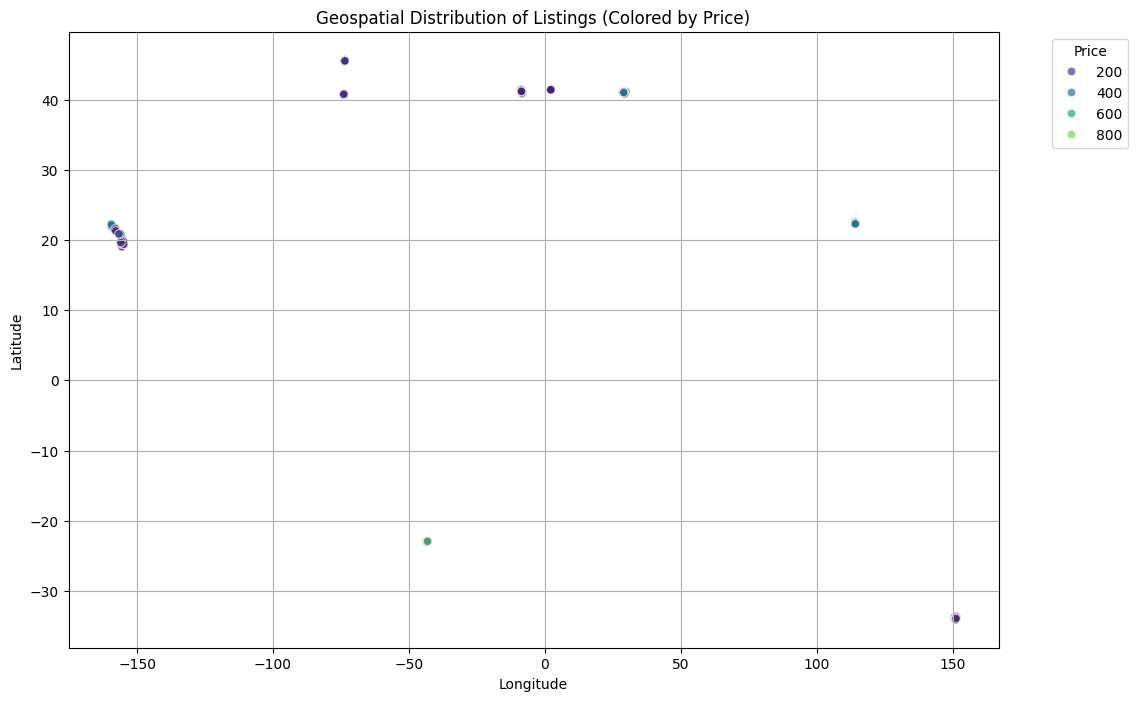

In [26]:
# Scatter Plot by Coordinates
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df[df['price'] < 1000], x='longitude', y='latitude', hue='price', palette='viridis', alpha=0.7)
plt.title('Geospatial Distribution of Listings (Colored by Price)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(title='Price', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

C:\Users\prasa\AppData\Local\Temp\ipykernel_10900\2260836786.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_price_by_city.values, y=avg_price_by_city.index, palette='flare')


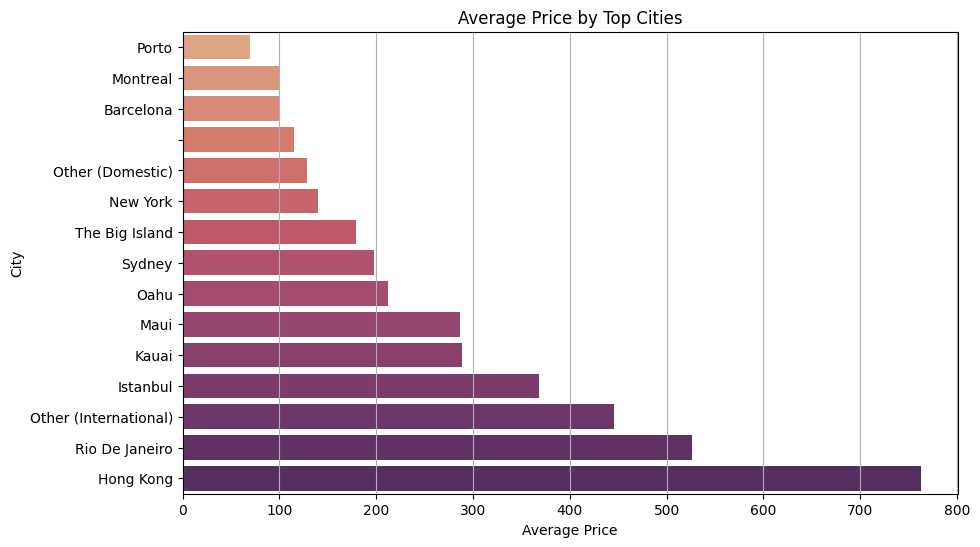

In [27]:
# Step 6B: Average Price by City (Top 15 Cities with Most Listings)
top_cities = df['city'].value_counts().nlargest(15).index
avg_price_by_city = df[df['city'].isin(top_cities)].groupby('city')['price'].mean().sort_values()

plt.figure(figsize=(10, 6))
sns.barplot(x=avg_price_by_city.values, y=avg_price_by_city.index, palette='flare')
plt.title('Average Price by Top Cities')
plt.xlabel('Average Price')
plt.ylabel('City')
plt.grid(axis='x')
plt.show()

In [31]:
df.to_csv("cleaned_airbnb_data.csv", index=False)


In [34]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5555 entries, 0 to 5554
Data columns (total 47 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   _id                    5555 non-null   object        
 1   listing_url            5555 non-null   object        
 2   name                   5555 non-null   object        
 3   summary                5555 non-null   object        
 4   space                  5555 non-null   object        
 5   description            5555 non-null   object        
 6   neighborhood_overview  5555 non-null   object        
 7   notes                  5555 non-null   object        
 8   transit                5555 non-null   object        
 9   access                 5555 non-null   object        
 10  interaction            5555 non-null   object        
 11  house_rules            5555 non-null   object        
 12  property_type          5555 non-null   object        
 13  roo